In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import config
import sys
sys.path.append(os.path.join(os.getcwd(), 'Aging_Model'))
import FigureConfig as FC

# Dataset

In [2]:
if config.current_dataset is not None:
    ds = config.datasets[config.current_dataset]
else:
    ds = config.datasets[0]

ds

'Iris'

# Read results

In [3]:
path = os.path.join(os.getcwd(), 'result', 'figures')
rawfiles = [f for f in os.listdir(path) if f.endswith('.txt') if f.startswith(ds)]
rawfiles.sort()
files = [f.replace(ds, '') for f in rawfiles]
rawfiles

['Iris_AAPNN_ACC_5_917.txt',
 'Iris_AAPNN_MAA_5_901.txt',
 'Iris_AAPNN_loss.txt',
 'Iris_PNN_ACC_2_926.txt',
 'Iris_PNN_MAA_2_829.txt',
 'Iris_PNN_loss.txt',
 'Iris_report.txt']

In [4]:
PNN_accs = [int(f[11:-4]) for f in files if f[1:8]=='PNN_ACC']
PNN_maas = [int(f[11:-4]) for f in files if f[1:8]=='PNN_MAA']
AAPNN_accs = [int(f[13:-4]) for f in files if f[1:10]=='AAPNN_ACC']
AAPNN_maas = [int(f[13:-4]) for f in files if f[1:10]=='AAPNN_MAA']

In [5]:
best_PNN_ACC_name_start = ds + '_' + 'PNN_ACC_'
best_PNN_ACC_name_end = '_' + str(max(PNN_accs)) + '.txt'
best_PNN_ACC_name = [f for f in rawfiles if f.startswith(best_PNN_ACC_name_start) if f.endswith(best_PNN_ACC_name_end)][0]
best_PNN_ACC_name

'Iris_PNN_ACC_2_926.txt'

In [6]:
best_PNN_MAA_name_start = ds + '_' + 'PNN_MAA_'
best_PNN_MAA_name_end = '_' + str(max(PNN_maas)) + '.txt'
best_PNN_MAA_name = [f for f in rawfiles if f.startswith(best_PNN_MAA_name_start) if f.endswith(best_PNN_MAA_name_end)][0]
best_PNN_MAA_name

'Iris_PNN_MAA_2_829.txt'

In [7]:
best_AAPNN_ACC_name_start = ds + '_' + 'AAPNN_ACC_'
best_AAPNN_ACC_name_end = '_' + str(max(AAPNN_accs)) + '.txt'
best_AAPNN_ACC_name = [f for f in rawfiles if f.startswith(best_AAPNN_ACC_name_start) if f.endswith(best_AAPNN_ACC_name_end)][0]
best_AAPNN_ACC_name

'Iris_AAPNN_ACC_5_917.txt'

In [8]:
best_AAPNN_MAA_name_start = ds + '_' + 'AAPNN_MAA_'
best_AAPNN_MAA_name_end = '_' + str(max(AAPNN_maas)) + '.txt'
best_AAPNN_MAA_name = [f for f in rawfiles if f.startswith(best_AAPNN_MAA_name_start) if f.endswith(best_AAPNN_MAA_name_end)][0]
best_AAPNN_MAA_name

'Iris_AAPNN_MAA_5_901.txt'

In [9]:
PNN_ACC = np.loadtxt(os.path.join(path, best_PNN_ACC_name))
PNN_MAA = np.loadtxt(os.path.join(path, best_PNN_MAA_name))
AAPNN_ACC = np.loadtxt(os.path.join(path, best_AAPNN_ACC_name))
AAPNN_MAA = np.loadtxt(os.path.join(path, best_AAPNN_MAA_name))

In [10]:
mean_acc_PNN = PNN_ACC[0]
std_acc_PNN = PNN_ACC[1]
mean_maa_PNN = PNN_MAA[0]
std_maa_PNN = PNN_MAA[1]
mean_acc_AAPNN = AAPNN_ACC[0]
std_acc_AAPNN = AAPNN_ACC[1]
mean_maa_AAPNN = AAPNN_MAA[0]
std_maa_AAPNN = AAPNN_MAA[1]

In [11]:
mean_maa_PNN

array([0.96666873, 0.94833076, 0.93432987, 0.913863  , 0.88479686,
       0.85933107, 0.843665  , 0.83019811, 0.81986499, 0.81286544,
       0.8091985 , 0.80506486, 0.80219841, 0.79973209, 0.79633236,
       0.7951991 , 0.79619896, 0.79659915, 0.79966587, 0.80173272,
       0.80739945, 0.81206608, 0.81366646, 0.81479931, 0.81479907,
       0.81553215, 0.81619877, 0.81886542, 0.81966537, 0.820732  ,
       0.82039863, 0.82126522, 0.82213199, 0.82266521, 0.82393181,
       0.82526517, 0.82599849, 0.82619846, 0.82713181, 0.82679838,
       0.82673174, 0.82693172, 0.82733178, 0.82806492, 0.82793146,
       0.82833153, 0.82853156, 0.82879829, 0.8286649 , 0.82873166])

In [12]:
mean_mean_acc_PNN   = np.mean(mean_acc_PNN)
mean_std_acc_PNN    = np.mean(std_acc_PNN)
mean_mean_maa_PNN   = np.mean(mean_maa_PNN)
mean_std_maa_PNN    = np.mean(std_maa_PNN)
mean_mean_acc_AAPNN = np.mean(mean_acc_AAPNN)
mean_std_acc_AAPNN  = np.mean(std_acc_AAPNN)
mean_mean_maa_AAPNN = np.mean(mean_maa_AAPNN)
mean_std_maa_AAPNN  = np.mean(std_maa_AAPNN)

In [13]:
acclost_PNN   = mean_acc_PNN.max()   - mean_acc_PNN.min()
acclost_AAPNN = mean_acc_AAPNN.max() - mean_acc_AAPNN.min()
maalost_PNN   = mean_maa_PNN.max()   - mean_maa_PNN.min()
maalost_AAPNN = mean_maa_AAPNN.max() - mean_maa_AAPNN.min()

# Print result to .txt file with some reformulation

In [14]:
rpm = np.random.randn()*100 + 1
rtab = np.random.randn()*100 + 1
spm = f'{rpm:.3f}'
stab = f'{rtab:.3f}'
spm, stab

('-37.570', '40.044')

In [15]:
report = np.array([mean_mean_acc_PNN,   rpm, mean_std_acc_PNN,   rtab, #acclost_PNN,   rtab,
                   mean_mean_acc_AAPNN, rpm, mean_std_acc_AAPNN, rtab, #acclost_AAPNN, rtab,
                   mean_mean_maa_PNN,   rpm, mean_std_maa_PNN,   rtab, #maalost_PNN,   rtab,
                   mean_mean_maa_AAPNN, rpm, mean_std_maa_AAPNN#, rtab, maalost_AAPNN
                  ])
np.savetxt(f'./result/figures/{ds}_report.txt', report, fmt='%.3f')

In [16]:
with open(f'./result/figures/{ds}_report.txt') as f:
    contents = f.read()
contents = contents.replace(f'\n{spm}\n', ' $'+'\\'+'pm$ ')
contents = contents.replace(f'\n{stab}\n', ' & ')
with open(f'./result/figures/{ds}_report.txt', 'w') as f:
    f.write(contents)

# Read random guess result

In [17]:
path = os.path.join(os.getcwd(), 'result', 'figures', 'RandomGuess')
rawfile = [f for f in os.listdir(path) if f.endswith('.txt') if f.startswith(ds)][0]
acc_RG = np.loadtxt(f'{path}/{rawfile}')
acc_RG

array(0.3)

In [18]:
with open(f'./result/figures/{ds}_report.txt') as f:
    contents = f.read()
contents = contents.replace('\n', f' & {acc_RG:.3f} \\\\ \\hline')
with open(f'./result/figures/{ds}_report.txt', 'w') as f:
    f.write(contents)

# Read and write Loss on Valid/Test

In [19]:
with open(f'./result/figures/{ds}_report.txt') as f:
    contents = f.read()
with open(f'./result/figures/{ds}_AAPNN_loss.txt') as f:
    AAPNN_loss = f.read()
with open(f'./result/figures/{ds}_PNN_loss.txt') as f:
    PNN_loss = f.read()
AAPNN_loss = AAPNN_loss.replace('\n','\t')
PNN_loss = PNN_loss.replace('\n','\t')

In [20]:
contents = contents + '\n' + PNN_loss + '\n' + AAPNN_loss
with open(f'./result/figures/{ds}_report.txt', 'w') as f:
    f.write(contents)

# Visualization

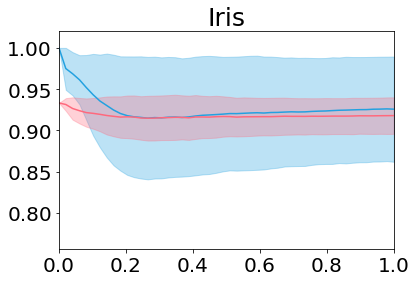

In [21]:
plt.fill_between(np.linspace(0,1,50), mean_acc_PNN-std_acc_PNN, np.where(mean_acc_PNN+std_acc_PNN < 1, mean_acc_PNN+std_acc_PNN , 1), alpha=0.3, color=FC.Cyan);
plt.fill_between(np.linspace(0,1,50), mean_acc_AAPNN-std_acc_AAPNN, np.where(mean_acc_AAPNN+std_acc_AAPNN < 1, mean_acc_AAPNN+std_acc_AAPNN , 1), alpha=0.3, color=FC.Pink);

plt.plot(np.linspace(0,1,50), mean_acc_PNN, label='PNN', color=FC.Cyan);
plt.plot(np.linspace(0,1,50), mean_acc_AAPNN, label='AAPNN', color=FC.Pink);

plt.plot(np.linspace(0,1,50), np.ones(50)*acc_RG, '--', label='AAPNN', color=FC.Black);

plt.title(f'{ds}', fontsize=25)
# plt.xlabel('Normalized time $t$', fontsize=20);
# plt.ylabel('Basic accuracy', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0, 1]);
plt.ylim([max([0, 0.9*min([min(mean_acc_PNN-std_acc_PNN), min(mean_acc_AAPNN-std_acc_AAPNN)])]),
          min([1.02, 1.05*max([max(mean_acc_PNN+std_acc_PNN), max(mean_acc_AAPNN+std_acc_AAPNN)])])]);

# plt.legend();
plt.savefig(f'./result/figures/{ds}_ACC_final.pdf', format='pdf', bbox_inches='tight')

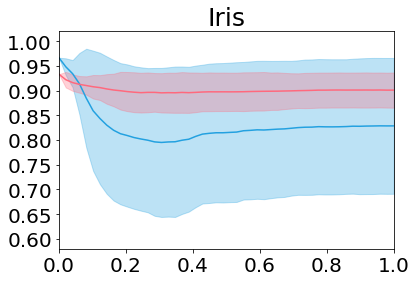

In [22]:
plt.fill_between(np.linspace(0,1,50), mean_maa_PNN-std_maa_PNN, np.where(mean_maa_PNN+std_maa_PNN < 1, mean_maa_PNN+std_maa_PNN , 1), alpha=0.3, color=FC.Cyan);
plt.fill_between(np.linspace(0,1,50), mean_maa_AAPNN-std_maa_AAPNN, np.where(mean_maa_AAPNN+std_maa_AAPNN < 1, mean_maa_AAPNN+std_maa_AAPNN , 1), alpha=0.3, color=FC.Pink);

plt.plot(np.linspace(0,1,50), mean_maa_PNN, label='PNN', color=FC.Cyan);
plt.plot(np.linspace(0,1,50), mean_maa_AAPNN, label='AAPNN', color=FC.Pink);

plt.plot(np.linspace(0,1,50), np.ones(50)*acc_RG, '--', label='AAPNN', color=FC.Black);

plt.title(f'{ds}', fontsize=25)
# plt.xlabel('Normalized time $t$', fontsize=20);
# plt.ylabel(f'Measuring-aware \n accuracy', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0, 1]);
plt.ylim([max([0, 0.9*min([min(mean_maa_PNN-std_maa_PNN), min(mean_maa_AAPNN-std_maa_AAPNN)])]),
          min([1.02, 1.05*max([max(mean_maa_PNN+std_maa_PNN), max(mean_maa_AAPNN+std_maa_AAPNN)])])]);
# plt.legend();
plt.savefig(f'./result/figures/{ds}_MAA_final.pdf', format='pdf', bbox_inches='tight')

# For legend

In [23]:
# plt.plot(np.linspace(0,1,50), mean_maa_PNN*0, label='mean of nominal training', color=FC.Cyan);
# plt.fill_between(np.linspace(0,1,50), mean_maa_PNN*0, mean_maa_PNN*0, label='std     of nominal training', alpha=0.3, color=FC.Cyan);
# plt.plot(np.linspace(0,1,50), mean_maa_AAPNN*0, label='mean of aging-aware training', color=FC.Pink);
# plt.fill_between(np.linspace(0,1,50), mean_maa_PNN*0, mean_maa_PNN*0, label='std     of aging-aware training',alpha=0.3, color=FC.Pink);
# plt.plot(np.linspace(0,1,50), np.ones(50)*acc_RG*0, '--', label='Random guess', color=FC.Black);
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.xlim([0, 1]);
# plt.ylim([0, 1]);
# plt.legend();
# plt.savefig(f'Legend.pdf', format='pdf', bbox_inches='tight')